<a href="https://colab.research.google.com/github/Dimasuxx/Project-KMMI-/blob/main/Final_Project_KMMI_Dimas_Jabbar_Rosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Processing Data

import beberapa modul

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

membaca file csv dari google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
List_of_Orders = pd.read_csv(r'/gdrive/MyDrive/KMMI/Project_KMMI/Indian_e_commerce/List of Orders.csv')
Order_Details = pd.read_csv(r'/gdrive/MyDrive/KMMI/Project_KMMI/Indian_e_commerce/Order Details.csv')

data teratas List of Orders.csv

In [ ]:
List_of_Orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


data teratas Order Details.csv

In [ ]:
Order_Details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


menggabungkan kedua tabel

In [ ]:
data1 = pd.merge(List_of_Orders,Order_Details,on='Order ID')
data1.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


mencetak jumlah missing value

In [ ]:
# Cetak jumlah missing value di setiap kolom
mv=data1.isna().sum()
print("\nJumlah missing value per kolom:\n", mv)


Jumlah missing value per kolom:
 Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

# Q1, Q3, dan IQR
Q1_Profit = data1['Profit'].quantile(0.25)
Q3_Profit = data1['Profit'].quantile(0.75)
IQR_Profit = Q3_Profit - Q1_Profit

Q1_Quantity = data1['Quantity'].quantile(0.25)
Q3_Quantity = data1['Quantity'].quantile(0.75)
IQR_Quantity = Q3_Quantity - Q1_Quantity

Q1_Amount = data1['Amount'].quantile(0.25)
Q3_Amount = data1['Amount'].quantile(0.75)
IQR_Amount = Q3_Amount - Q1_Amount

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', data1.shape)

# Removing outliers
dataP = data1[~((data1['Profit'] < (Q1_Profit - 1.5 * IQR_Profit)) |(data1['Profit'] > (Q3_Profit + 1.5 * IQR_Profit)))]
dataQ = dataP[~((dataP['Quantity'] < (Q1_Quantity - 1.5 * IQR_Quantity)) |(dataP['Quantity'] > (Q3_Quantity + 1.5 * IQR_Quantity)))]
data = dataQ[~((dataQ['Amount'] < (Q1_Amount - 1.5 * IQR_Amount)) |(dataQ['Amount'] > (Q3_Amount + 1.5 * IQR_Amount)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir dataP: ', dataP.shape)
print('Shape akhir dataQ : ', dataQ.shape)
print('Shape akhir data : ', data.shape)

Shape awal:  (1500, 10)
Shape akhir dataP:  (1209, 10)
Shape akhir dataQ :  (1199, 10)
Shape akhir data :  (1157, 10)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   int64  
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 128.9+ KB


In [ ]:
data1['Order Date'] = data1['Order Date'].astype('datetime64[ns]')

In [ ]:
data1 = data1.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   float64       
 6   Profit        1500 non-null   float64       
 7   Quantity      1500 non-null   int64         
 8   Category      1500 non-null   object        
 9   Sub-Category  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 128.9+ KB


In [ ]:
data1['Category'] = data1['Category'].astype('category')
data1['Sub-Category'] = data1['Sub-Category'].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   float64       
 6   Profit        1500 non-null   float64       
 7   Quantity      1500 non-null   int64         
 8   Category      1500 non-null   category      
 9   Sub-Category  1500 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 109.3+ KB


In [ ]:
%matplotlib inline

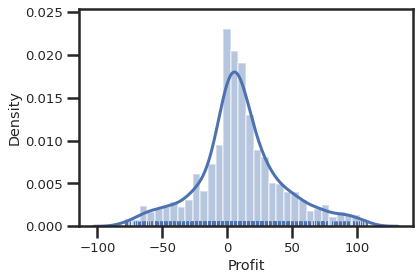

In [ ]:
p = sns.distplot(data['Profit'], kde=True, rug=True)

In [ ]:
data['Month'] =pd.DataFrame(data["Order Date"])
data['Month'] =pd.DatetimeIndex(data['Order Date']).strftime('%m-%Y')

In [ ]:
data['Month'].value_counts()

01-2019    128
08-2018    117
03-2019    112
11-2018     90
10-2018     87
06-2018     75
04-2018     66
05-2018     62
09-2018     59
02-2019     53
07-2018     52
12-2018     40
03-2018     35
01-2018     34
10-2019     27
08-2019     21
04-2019     20
09-2019     17
05-2019     17
06-2019     13
07-2019     11
11-2019     10
02-2018      8
12-2019      3
Name: Month, dtype: int64

In [ ]:
data['Day'] =pd.DataFrame(data["Order Date"])
data['Day'] =pd.DatetimeIndex(data['Order Date']).strftime('%A')

In [ ]:
import calendar

data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month_Number'] = pd.DatetimeIndex(data['Order Date']).month
data['Month'] = data['Month_Number'].apply(lambda x: calendar.month_abbr[x])

year_month = data.groupby(['Year','Month_Number','Month']).sum().sort_values(['Year','Month_Number','Month'])
year_month

Amount  Profit  Quantity
Year Month_Number Month                           
2018 1            Jan     2539.0  -434.0       132
     2            Feb     1016.0    74.0        18
     3            Mar     4222.0   228.0       122
     4            Apr     9693.0   227.0       207
     5            May     8222.0   103.0       196
     6            Jun     7540.0  -561.0       256
     7            Jul     4972.0  -191.0       160
     8            Aug    14408.0  -253.0       399
     9            Sep     7122.0  -402.0       201
     10           Oct    11443.0  1748.0       308
     11           Nov     9905.0  1104.0       294
     12           Dec     6171.0   385.0       135
2019 1            Jan    18302.0  3182.0       438
     2            Feb     6575.0  1393.0       186
     3            Mar    12850.0  2021.0       361
     4            Apr     2346.0   327.0        69
     5            May     2519.0   268.0        57
     6            Jun     2229.0   406.0        45
     7            Jul     2636.0   490.0        43
     8            Aug     3540.0   418.0        74
     9            Sep     2310.0   476.0        52
     10           Oct     4099.0   626.0        90
     11           Nov     1470.0   158.0        32
     12           Dec      259.0    57.0         5

In [ ]:
data['Day'].value_counts()

Thursday     221
Friday       175
Sunday       173
Monday       169
Tuesday      159
Saturday     137
Wednesday    123
Name: Day, dtype: int64

In [ ]:
data['Profit'].describe()

count    1157.000000
mean       10.242005
std        32.537977
min       -79.000000
25%        -5.000000
50%         8.000000
75%        26.000000
max       108.000000
Name: Profit, dtype: float64

In [ ]:
data['Profit Category']=pd.cut(data['Profit'],bins=[-79.000000,0.000000,8.000000,26.000000,108.000000],labels=['Rugi','Keuntungan Kecil','Keuntungan Sedang', 'Keuntungan Tinggi'])

In [ ]:
data['Profit Category'].value_counts()

Rugi                 402
Keuntungan Tinggi    282
Keuntungan Sedang    277
Keuntungan Kecil     194
Name: Profit Category, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 1 to 1499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Order ID         1157 non-null   object  
 1   Order Date       1157 non-null   object  
 2   CustomerName     1157 non-null   object  
 3   State            1157 non-null   object  
 4   City             1157 non-null   object  
 5   Amount           1157 non-null   float64 
 6   Profit           1157 non-null   float64 
 7   Quantity         1157 non-null   int64   
 8   Category         1157 non-null   object  
 9   Sub-Category     1157 non-null   object  
 10  Month            1157 non-null   object  
 11  Day              1157 non-null   object  
 12  Year             1157 non-null   int64   
 13  Month_Number     1157 non-null   int64   
 14  Profit Category  1155 non-null   category
dtypes: category(1), float64(2), int64(3), object(9)
memory usage: 136.9+ KB


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['City'] = data['City'].astype('category')
data['CustomerName'] = data['CustomerName'].astype('category')
data['State'] = data['State'].astype('category')
data["Category"]=data["Category"].astype('category')
data["Sub-Category"]=data["Sub-Category"].astype('category')
data['Quantity']=data['Quantity'].astype('float64')
data.dtypes

Order ID                   object
Order Date         datetime64[ns]
CustomerName             category
State                    category
City                     category
Amount                    float64
Profit                    float64
Quantity                  float64
Category                 category
Sub-Category             category
Month                      object
Day                        object
Year                        int64
Month_Number                int64
Profit Category          category
dtype: object

In [ ]:
print(data.shape)
data.duplicated().sum()

(1157, 15)


0

In [ ]:
data_num = data.select_dtypes(include = ['float64'])
data_num.head()

,Amount,Profit,Quantity
1,66.0,-12.0,5.0
2,8.0,-2.0,3.0
3,80.0,-56.0,4.0
8,119.0,-5.0,8.0
10,24.0,-30.0,1.0


In [ ]:
data_cat = data.select_dtypes(include = ['category'])
data_cat.head()

,CustomerName,State,City,Category,Sub-Category,Profit Category
1,Bharat,Gujarat,Ahmedabad,Clothing,Stole,Rugi
2,Bharat,Gujarat,Ahmedabad,Clothing,Hankerchief,Rugi
3,Bharat,Gujarat,Ahmedabad,Electronics,Electronic Games,Rugi
8,Pearl,Maharashtra,Pune,Clothing,Saree,Rugi
10,Jahan,Madhya Pradesh,Bhopal,Furniture,Chairs,Rugi


In [ ]:
data['Profit Category'].dropna()
data['Profit Category'].isnull().sum()
data['Profit Category'].dropna()

1                    Rugi
2                    Rugi
3                    Rugi
8                    Rugi
10                   Rugi
              ...        
1492    Keuntungan Sedang
1493     Keuntungan Kecil
1494    Keuntungan Tinggi
1498    Keuntungan Sedang
1499    Keuntungan Sedang
Name: Profit Category, Length: 1155, dtype: category
Categories (4, object): ['Rugi' < 'Keuntungan Kecil' < 'Keuntungan Sedang' <
                         'Keuntungan Tinggi']

In [ ]:
data['Category'].value_counts()

Clothing       854
Electronics    169
Furniture      134
Name: Category, dtype: int64

In [ ]:
data['Sub-Category'].value_counts()

Hankerchief         191
Stole               187
Saree               153
T-shirt              76
Shirt                65
Skirt                63
Furnishings          58
Accessories          56
Leggings             53
Electronic Games     49
Kurti                46
Chairs               43
Phones               43
Bookcases            32
Printers             21
Trousers             20
Tables                1
Name: Sub-Category, dtype: int64

In [ ]:
CT = pd.crosstab(index=data["Category"], columns=data["State"])
CT

State,Andhra Pradesh,Bihar,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Nagaland,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,West Bengal
Category,,,,,,,,,,,,,,,,,,,
Clothing,22,35,44,32,57,13,16,21,33,23,192,155,27,36,41,16,14,41,36
Electronics,5,11,6,3,7,1,5,8,5,5,25,38,8,7,11,4,2,7,11
Furniture,1,5,10,1,11,4,4,8,4,6,36,21,3,4,5,1,2,4,4


In [ ]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month,Day,Year,Month_Number,Profit Category
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole,Jan,Thursday,2018,1,Rugi
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3.0,Clothing,Hankerchief,Jan,Thursday,2018,1,Rugi
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4.0,Electronics,Electronic Games,Jan,Thursday,2018,1,Rugi
8,B-25602,2018-01-04,Pearl,Maharashtra,Pune,119.0,-5.0,8.0,Clothing,Saree,Jan,Thursday,2018,1,Rugi
10,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal,24.0,-30.0,1.0,Furniture,Chairs,Mar,Sunday,2018,3,Rugi


#Visualisasi Eksplorasi Data

In [ ]:
import plotly as py
import plotly.express as px
import pandas as pd

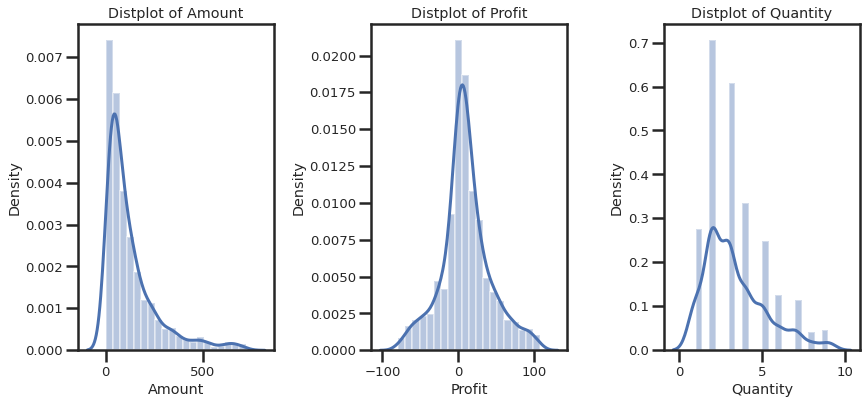

In [ ]:
plt.figure(1 , figsize = (14 , 6))
n = 0 
for x in ['Amount' , 'Profit' , 'Quantity']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

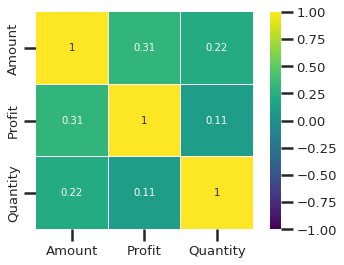

In [ ]:
# Korelasi antar variabel data numerik
corr = data_num.corr()
c = sns.heatmap(corr, cmap='viridis', vmax=1, vmin= -1, linewidths=0.1, annot=True, square= True);

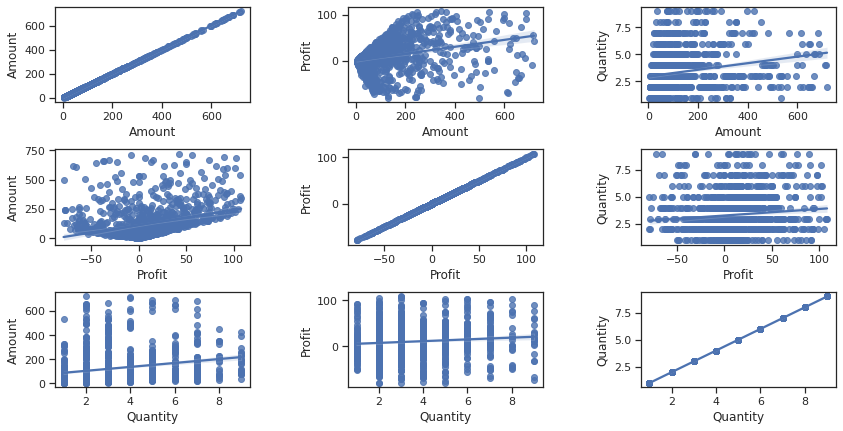

In [ ]:
plt.figure(1 , figsize = (14 , 7))
n = 0 
for x in ['Amount' , 'Profit' , 'Quantity']:
    for y in ['Amount' , 'Profit' , 'Quantity']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

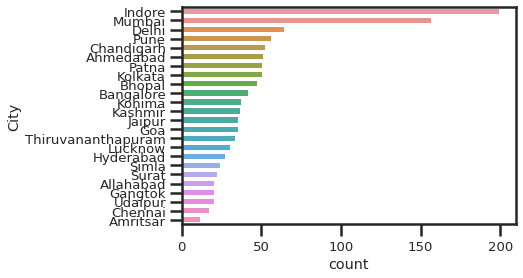

In [ ]:
# barplot kota yang melakukan pemebelian
p = sns.countplot(y = "City", data = data ,order = data['City'].value_counts().index);

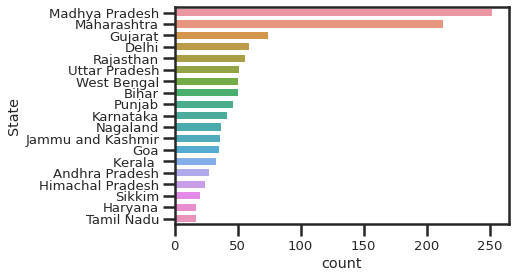

In [ ]:
# Barplot negara bagian yang melakukan pembelian
p = sns.countplot(y = "State", data = data ,order = data['State'].value_counts().index);

In [ ]:
details_category = data.groupby('Category').sum().reset_index()
fig = px.pie(details_category, values='Quantity', names='Category', color='Category',
             color_discrete_map={'Clothing':'cyan',
                                 'Electronics':'royalblue',
                                 'Furniture':'darkblue'},
            title='Total Quantity Sold per Category')
fig.show()

In [ ]:
details_subcategory = data.groupby('Sub-Category').sum().reset_index()
fig = px.pie(details_subcategory, values='Quantity', names='Sub-Category', color='Sub-Category',
            title='Total Quantity Sold per Sub-Category')
fig.show()

In [ ]:
fig = px.density_heatmap(data, x="Order Date", y="Category")
fig.show()

In [ ]:
fig = px.density_heatmap(data, x="Order Date", y="Sub-Category")
fig.show()

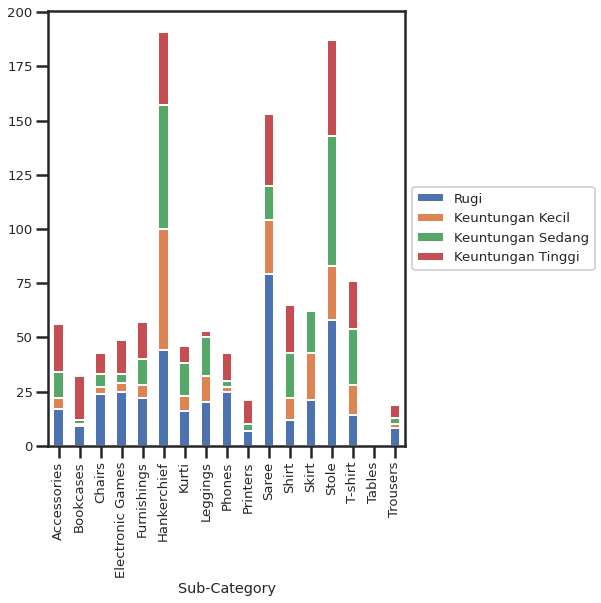

In [ ]:
#Stacked Chart untuk kategori Profit Total Perbelanjaan tiap negara
CT = pd.crosstab(index=data["Sub-Category"], columns=data["Profit Category"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)
ax = plt.subplot(111)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
profit_by_Sub_Category = data.groupby('Sub-Category').sum().reset_index().sort_values(['Profit'])
profit_by_Sub_Category["Color"] = np.where(profit_by_Sub_Category["Profit"]<0, 'Loss', 'Profit')


fig = px.bar(profit_by_Sub_Category, x='Sub-Category', y='Profit',
             color='Color', color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#2F9599'},
             title="Profit by Sub-Category",
             labels=dict(Color="Results"),
             template='plotly_white')

# Disabling Zoom
fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.2f')

fig.update_xaxes(
        tickangle = -90,
        title_text = "Sub-Category",
)

fig.show()

In [ ]:
profit_by_state = data.groupby('State').sum().reset_index().sort_values(['Profit'])
profit_by_state["Color"] = np.where(profit_by_state["Profit"]<0, 'Loss', 'Profit')


fig = px.bar(profit_by_state, x='State', y='Profit',
             color='Color', color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#2F9599'},
             title="Profit by State",
             labels=dict(Color="Results"),
             template='plotly_white')

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.2f')

fig.update_xaxes(
        tickangle = -90,
        title_text = "States",
)

fig.show()

#K-Means

In [ ]:
customer_seg = data.groupby('CustomerName').sum().reset_index()
customer_seg = customer_seg[['CustomerName', 'Amount', 'Quantity']]
customer_seg.head()

,CustomerName,Amount,Quantity
0,Aakanksha,74.0,8.0
1,Aarushi,2029.0,30.0
2,Aashna,1576.0,25.0
3,Aastha,259.0,18.0
4,Aayush,340.0,15.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 1 to 1499
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1157 non-null   object        
 1   Order Date    1157 non-null   datetime64[ns]
 2   CustomerName  1157 non-null   category      
 3   State         1157 non-null   category      
 4   City          1157 non-null   category      
 5   Amount        1157 non-null   float64       
 6   Profit        1157 non-null   float64       
 7   Quantity      1157 non-null   float64       
 8   Category      1157 non-null   category      
 9   Sub-Category  1157 non-null   category      
 10  Month         1157 non-null   object        
 11  Day           1157 non-null   object        
 12  Year          1157 non-null   int64         
 13  Month_Number  1157 non-null   int64         
dtypes: category(5), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 152.0+ 

In [ ]:
#Menyiapkan Tabel RFM
data_rfm = data[['Order ID','Order Date','CustomerName','Amount']]
data_rfm.head()

,Order ID,Order Date,CustomerName,Amount
1,B-25601,2018-01-04,Bharat,66.0
2,B-25601,2018-01-04,Bharat,8.0
3,B-25601,2018-01-04,Bharat,80.0
8,B-25602,2018-01-04,Pearl,119.0
10,B-25603,2018-03-04,Jahan,24.0


In [ ]:
#melihat tanggal terbaru dan terlama
data_rfm['Order Date'].min(),data_rfm['Order Date'].max()

(Timestamp('2018-01-04 00:00:00'), Timestamp('2019-12-03 00:00:00'))

In [ ]:
import datetime as dt
NOW = dt.datetime(2019, 12, 3)

In [ ]:
#Tabel RFM
rfm= data_rfm.groupby('CustomerName').agg({'Order Date': lambda date: (NOW - date.max()).days, #Recency
                                        'Order ID':'count',   #Frequency
                                        'Amount': 'sum'})     #Monetary value
rfm.head()

,Order Date,Order ID,Amount
CustomerName,,,
Aakanksha,695,2,74.0
Aarushi,256,8,2029.0
Aashna,600,6,1576.0
Aastha,403,4,259.0
Aayush,383,5,340.0


In [ ]:
#mengganti nama kolom
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerName,,,
Aakanksha,695,2,74.0
Aarushi,256,8,2029.0
Aashna,600,6,1576.0
Aastha,403,4,259.0
Aayush,383,5,340.0


In [ ]:
#STANDARISASI
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaleddata = pd.DataFrame(scale.fit_transform(rfm), columns=rfm.columns)
scaleddata.head()

,recency,frequency,monetary
0,2.206822,-0.601030,-0.839629
1,-0.771122,1.341258,3.125671
2,1.562392,0.693828,2.206857
3,0.226048,0.046399,-0.464396
4,0.090378,0.370114,-0.300105


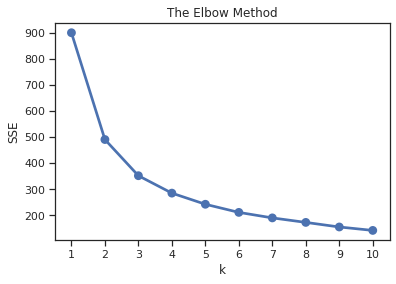

In [ ]:
#ELBOW METHOD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaleddata)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
pip install umap-learn[parametric_umap]

Text(0.5, 1.0, 'Elbow curve')

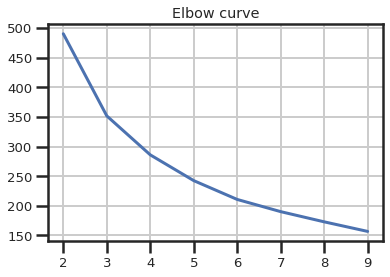

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(scaleddata)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

In [ ]:
# Importing Modules
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

array([0, 2, 2, 1, 1, 1, 2, 1, 2, 1], dtype=int32)

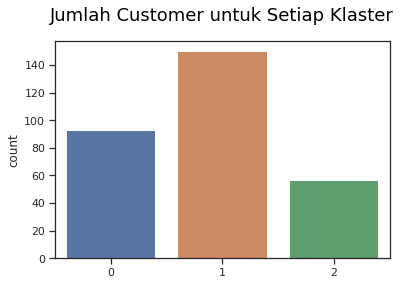

In [ ]:
#K-means
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(scaleddata)
C_kmpp = kmPP.predict(scaleddata)

plt.title('Jumlah Customer untuk Setiap Klaster', loc='center', pad=20, fontsize=18, color='black')
sns.countplot(C_kmpp)
C_kmpp[:10]

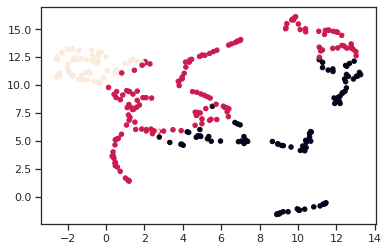

In [ ]:
#Persebaran klaster
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(scaleddata)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp, s=20)
plt.show()

In [ ]:
#Jumlah customer di tiap klaster
scaleddata['Cluster'] = kmPP.labels_

distdata = scaleddata['Cluster'].value_counts()
print(distdata)

1    150
0     93
2     57
Name: Cluster, dtype: int64


In [ ]:
#Rata-rata variabel di tiap klaster
rfm["Cluster"] = kmPP.labels_
rfm_cluster = rfm.groupby('Cluster').agg({
    'recency':'mean','frequency':'mean','monetary':'mean'}).round(2)
rfm_cluster

,recency,frequency,monetary
Cluster,,,
0,534.05,2.47,243.40
1,298.60,2.78,334.35
2,288.53,8.95,1291.23


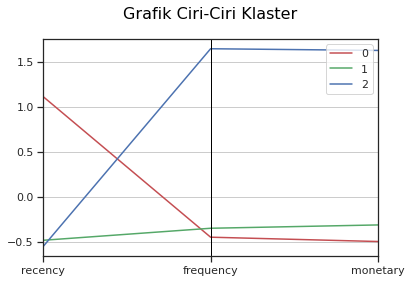

In [ ]:
#Grafik ciri2 klaster
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

plt.title('Grafik Ciri-Ciri Klaster', loc='center', pad=20, fontsize=16, color='black')
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g','b','y'))
plt.show()

In [ ]:
rfm.head()

,recency,frequency,monetary,Cluster
CustomerName,,,,
Aakanksha,695,2,74.0,0
Aarushi,256,8,2029.0,2
Aashna,600,6,1576.0,2
Aastha,403,4,259.0,1
Aayush,383,5,340.0,1


In [ ]:
#Menggabungkan tabel awal dengan tabel rfm
data2 = pd.merge(data1,rfm,on='CustomerName')
data2.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,recency,frequency,monetary,Cluster
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,1,5,304.0,1
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,1,5,304.0,1
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,1,5,304.0,1
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,1,5,304.0,1
4,B-26011,2019-12-02,Bharat,Gujarat,Ahmedabad,93.0,44.0,2,Clothing,Stole,1,5,304.0,1


In [ ]:
data2['Cluster'] = data2['Cluster'].astype('str')

In [ ]:
#Memisahkan tabel berdasarkan klaster
klaster0 = data2.loc[data2['Cluster']=='0']
klaster1 = data2.loc[data2['Cluster']=='1']
klaster2 = data2.loc[data2['Cluster']=='2']

#Klaster 0

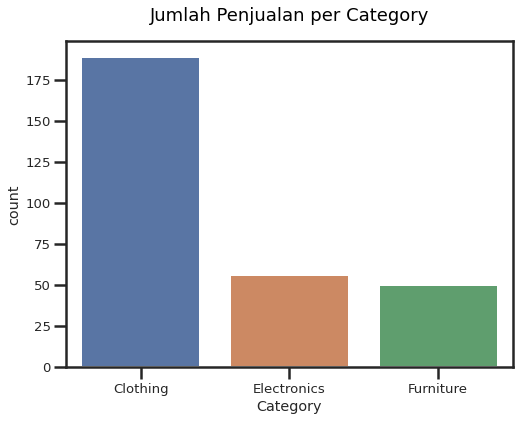

In [ ]:
#Jumlah Penjualan per Category di klaster 0
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster0['Category'])

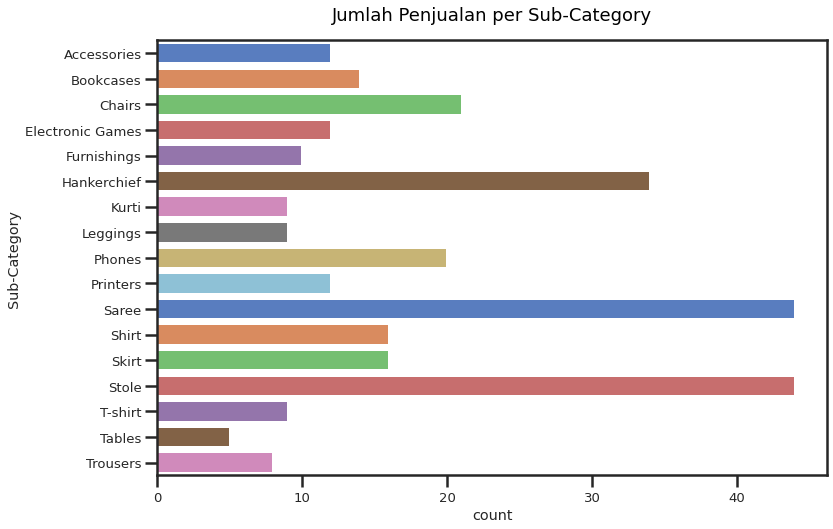

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 0
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster0)

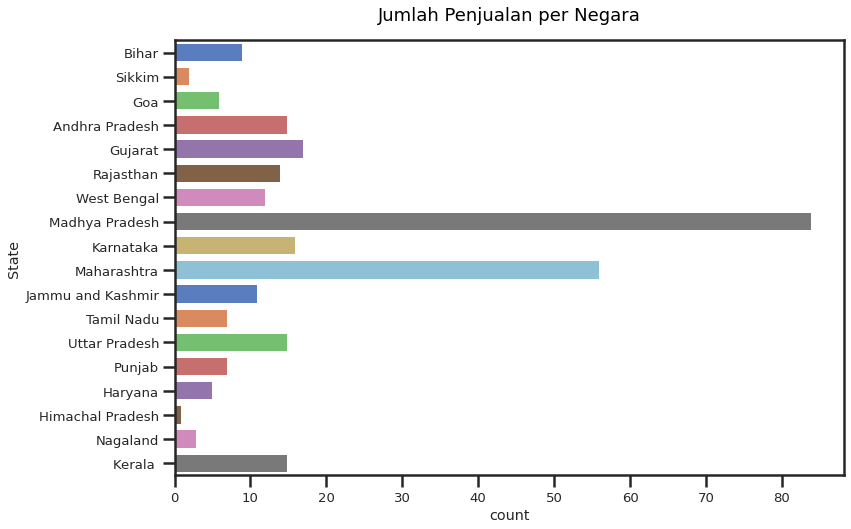

In [ ]:
#Jumlah Penjualan per Negara di klaster 0
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Negara', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'State', palette = 'muted', data=klaster0)

#Klaster 1

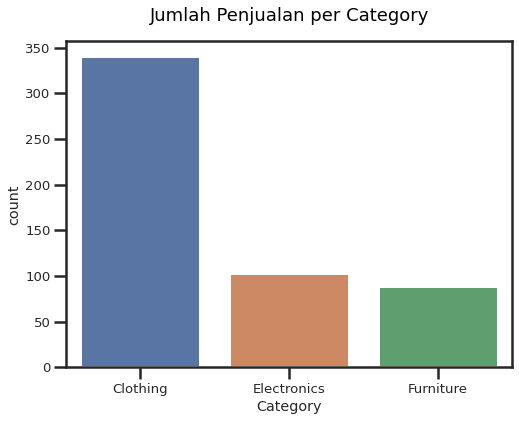

In [ ]:
#Jumlah Penjualan per Category di klaster 1
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster1['Category'])

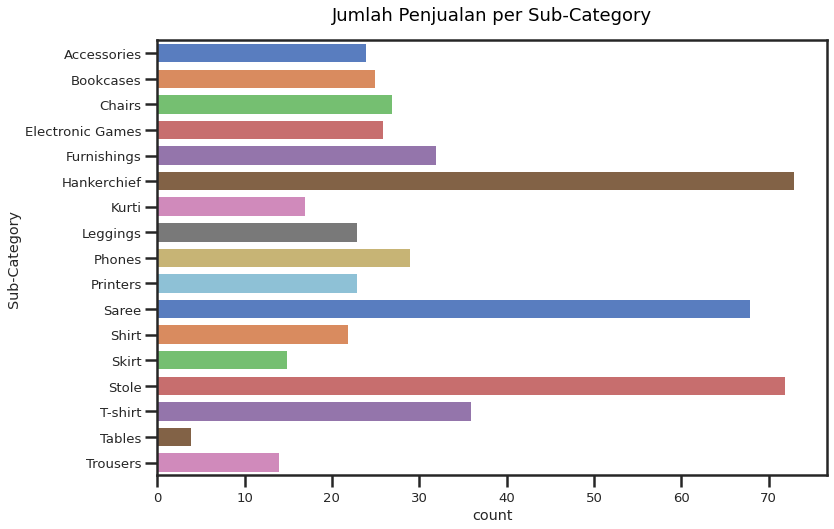

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 1
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster1)

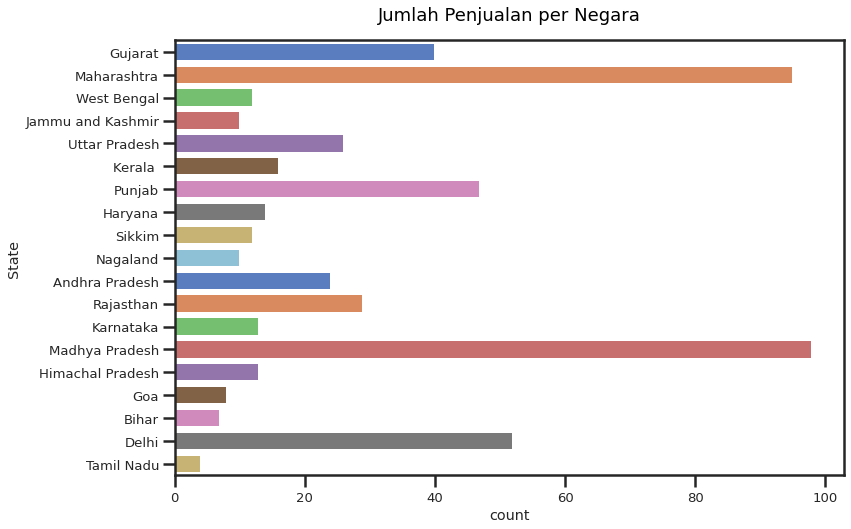

In [ ]:
#Jumlah Penjualan per Negara di klaster 1
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Negara', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'State', palette = 'muted', data=klaster1)

#Klaster 2

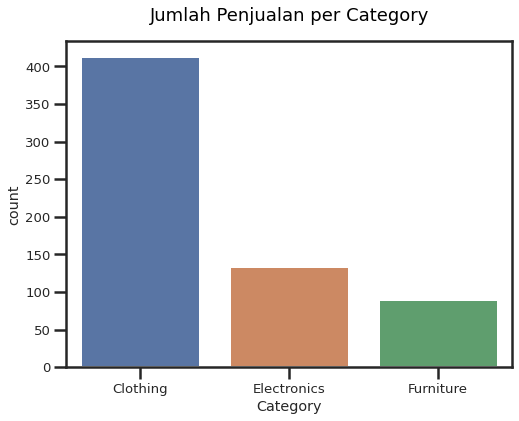

In [ ]:
#Jumlah Penjualan per Category di klaster 2
plt.figure(figsize=(8,6))
plt.title('Jumlah Penjualan per Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(klaster2['Category'])

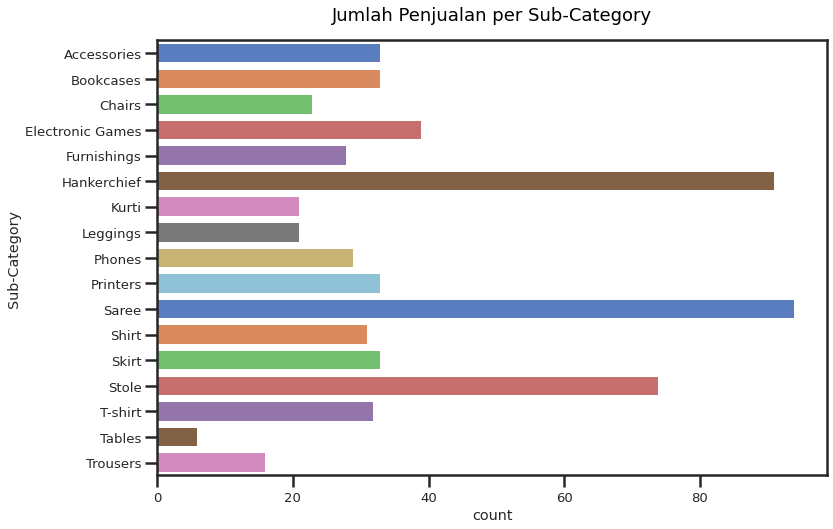

In [ ]:
#Jumlah Penjualan per Sub-Category di klaster 2
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Sub-Category', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'Sub-Category', palette = 'muted', data=klaster2)

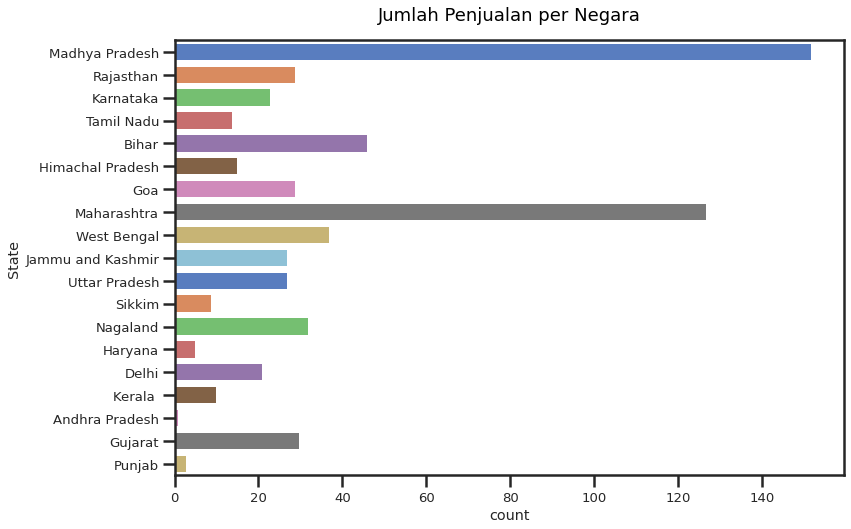

In [ ]:
#Jumlah Penjualan per Negara di klaster 2
plt.figure(figsize=(12,8))
plt.title('Jumlah Penjualan per Negara', loc='center', pad=20, fontsize=18, color='black')
sns.set_context("poster", font_scale=.6)
sns.countplot(y = 'State', palette = 'muted', data=klaster2)